In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -uq '/content/drive/MyDrive/Colab Notebooks/archive (2).zip'

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/archive (2).zip, /content/drive/MyDrive/Colab Notebooks/archive (2).zip.zip or /content/drive/MyDrive/Colab Notebooks/archive (2).zip.ZIP.


Predict how long patient can stay in the hospital.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib
'''
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
'''

'\nimport tensorflow as tf\n\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\n'

Cleaning and Rearranging data

In [4]:
df_train = pd.read_csv("/home/jpozoc/barracuda/jpozoc/Ingenieria_Biomedica/4_INGENIERÍA_BIOMEDICA/2_CUATRIMESTRE/PMD/Notebooks/archive/healthcare/train_data.csv",index_col=0)
#df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/healthcare/test_data.csv",index_col=0)
print(df_train.shape)
#print(df_test.shape)

(318438, 17)


In [6]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [8]:
df_train.columns.values

array(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Ward_Facility_Code', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'Stay', 'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R',
       'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'Severity of Illness_Extreme',
       'Severity of Illness_Minor', 'Severity of Illness_Moderate',
       'Age_0-10', 'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50',
       'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100'],
      dtype=object)

In [9]:
df_train.Department.unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [10]:
df_train.Hospital_region_code.unique()

array(['Z', 'X', 'Y'], dtype=object)

In [11]:
df_train.Ward_Type.unique()

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

In [12]:
df_train['Severity of Illness'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [13]:
df_train['Hospital_type_code'].unique()

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

In [14]:
df_train.Ward_Facility_Code.unique()

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [15]:
df_train["Visitors with Patient"].unique()

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25])

In [16]:
df_train.Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [17]:
df_train.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [18]:
df_train.Admission_Deposit.unique()

array([4911., 5954., 4745., ..., 1937., 9439., 2349.])

/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


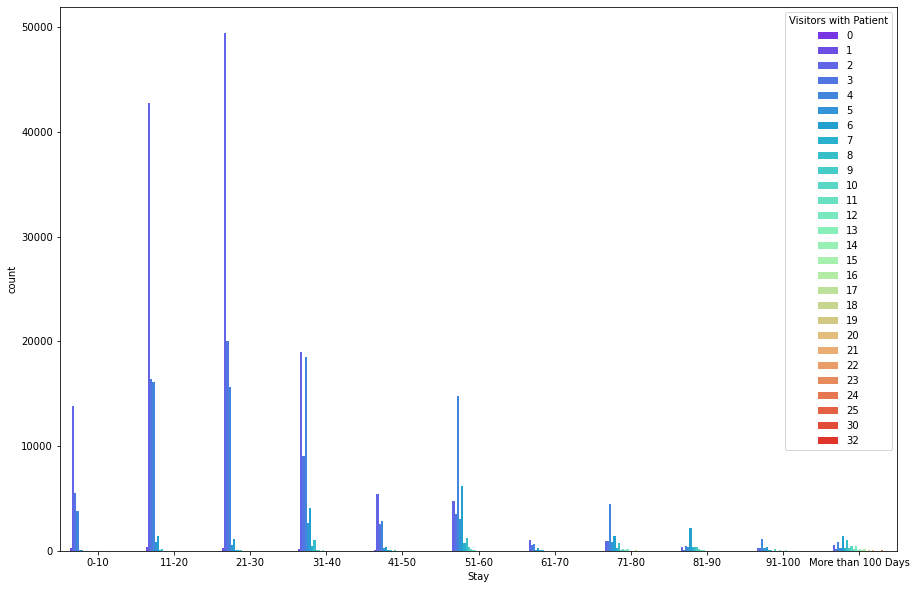

In [20]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Stay'].sort_values(),hue=df_train['Visitors with Patient'],palette='rainbow', )
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/archive/healthcare/graf1.jpg')
plt.show()


/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


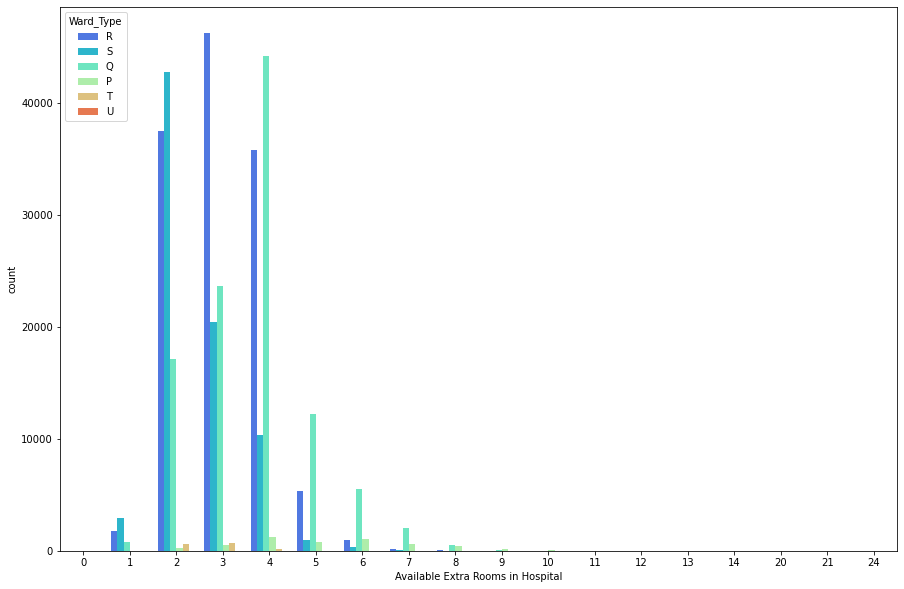

In [21]:
plt.figure(figsize = (15,10))

sns.countplot(df_train['Available Extra Rooms in Hospital'],hue=df_train['Ward_Type'],palette='rainbow', )
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/archive/healthcare/graf2.jpg')
plt.show()


In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Ward_Type'],hue=df_train['Stay'],palette='rainbow', )
plt.savefig('/content/drive/MyDrive/Colab Notebooks/archive/healthcare/graf3.jpg')
plt.show()


In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Type of Admission'],hue=df_train['Department'],palette='rainbow')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/archive/healthcare/graf4.jpg')
plt.show()


Convert Healthcare data to numerical format


In [22]:
def Convert_to_Num(df):
    dept_lst = df["Department"].unique()
    dept_lst.sort()
    dept_dict = dict(zip(dept_lst, range(len(dept_lst))))
    df.Department.replace(dept_dict, inplace=True)
    print(dept_dict)
    
    HRC_lst = df["Hospital_region_code"].unique()
    HRC_lst.sort()
    HRC_dict = dict(zip(HRC_lst, range(len(HRC_lst))))
    df.Hospital_region_code.replace(HRC_dict, inplace=True)
    print(HRC_dict)
    
    ward_lst = df["Ward_Type"].unique()
    ward_lst.sort()
    ward_dict = dict(zip(ward_lst, range(len(ward_lst))))
    df.Ward_Type.replace(ward_dict, inplace=True)
    print(ward_dict)
    
    WFC_lst = df["Ward_Facility_Code"].unique()
    WFC_lst.sort()
    WFC_dict = dict(zip(WFC_lst, range(len(WFC_lst))))
    df.Ward_Facility_Code.replace(WFC_dict, inplace=True)
    print(WFC_dict)
    
    TOA_lst = df["Type of Admission"].unique()
    TOA_lst.sort()
    TOA_dict = dict(zip(TOA_lst, range(len(TOA_lst))))
    df["Type of Admission"].replace(TOA_dict, inplace=True)
    print(TOA_dict)
   
    SOI_lst = df["Severity of Illness"].unique()
    SOI_lst.sort()
    SOI_dict = dict(zip(SOI_lst, range(len(SOI_lst))))
    df["Severity of Illness"].replace(SOI_dict, inplace=True)
    print(SOI_dict)
    
    age_lst = df["Age"].unique()
    age_lst.sort()
    age_dict = dict(zip(age_lst, range(len(age_lst))))
    df["Age"].replace(age_dict, inplace=True)
    print(age_dict)
    
    HTC_lst = df["Hospital_type_code"].unique()
    HTC_lst.sort()
    HTC_dict = dict(zip(HTC_lst, range(len(HTC_lst))))
    df["Hospital_type_code"].replace(HTC_dict, inplace=True)
    print(HTC_dict)
    
Convert_to_Num(df_train)
stay_list = df_train["Stay"].unique()
stay_list.sort()
dept_Stay = dict(zip(stay_list, range(len(stay_list))))
df_train["Stay"].replace(dept_Stay, inplace=True)
print(dept_Stay)

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'Extreme': 0, 'Minor': 1, 'Moderate': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


Fill empty records

In [23]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 1 to 318438
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  int64  
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  int64  
 6   Ward_Type                          318438 non-null  int64  
 7   Ward_Facility_Code                 318438 non-null  int64  
 8   Bed Grade                          318325 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [25]:
df_train["Bed Grade"].unique()

array([ 2.,  3.,  4.,  1., nan])

In [26]:
df_train.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Visitors with Patient                   0
Admission_Deposit                       0
Stay                                    0
Department_TB & Chest disease           0
Department_anesthesia                   0
Department_gynecology                   0
Department_radiotherapy                 0
Department_surgery                      0
Ward_Type_P                             0
Ward_Type_Q                             0
Ward_Type_R                             0
Ward_Type_S                             0
Ward_Type_T                             0
Ward_Type_U                             0
Type of Admission_Emergency       

In [28]:
df_train["Bed Grade"] = df_train["Bed Grade"].fillna(2)

df_train["Bed Grade"].unique()

array([2., 3., 4., 1.])

In [29]:
df_train_hot.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Visitors with Patient                   0
Admission_Deposit                       0
Stay                                    0
Department_TB & Chest disease           0
Department_anesthesia                   0
Department_gynecology                   0
Department_radiotherapy                 0
Department_surgery                      0
Ward_Type_P                             0
Ward_Type_Q                             0
Ward_Type_R                             0
Ward_Type_S                             0
Ward_Type_T                             0
Ward_Type_U                             0
Type of Admission_Emergency       

In [30]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Hospital_code,318438.0,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0
Hospital_type_code,318438.0,1.256841,1.535712,0.0,0.0,1.0,2.0,6.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.0,5.0,7.0,13.0
Hospital_region_code,318438.0,0.778098,0.752527,0.0,0.0,1.0,1.0,2.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.0,3.0,4.0,24.0
Department,318438.0,1.943779,0.561245,0.0,2.0,2.0,2.0,4.0
Ward_Type,318438.0,1.888575,0.804655,0.0,1.0,2.0,2.0,5.0
Ward_Facility_Code,318438.0,3.286913,1.688050,0.0,2.0,4.0,5.0,5.0
Bed Grade,318438.0,2.625585,0.873070,1.0,2.0,3.0,3.0,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.0,65724.5,98470.0,131624.0


In [31]:
df_train = df_train.drop(columns='City_Code_Patient')

In [32]:
df_train['Bed Grade'] = df_train['Bed Grade'].apply(int)

In [33]:
df_train['Admission_Deposit'] = df_train['Admission_Deposit'].apply(int)

In [34]:
df_train = df_train.rename(columns={'Available Extra Rooms in Hospital': 'Available_Extra_Rooms_in_Hospital', 'Bed Grade': 'Bed_Grade', 'Type of Admission': 'Type_of_Admission', 'Severity of Illness': 'Severity_of_Illness', 'Visitors with Patient': 'Visitors_with_Patient','Stay':'label'})

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 1 to 318438
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Hospital_code                      318438 non-null  int64
 1   Hospital_type_code                 318438 non-null  int64
 2   City_Code_Hospital                 318438 non-null  int64
 3   Hospital_region_code               318438 non-null  int64
 4   Available_Extra_Rooms_in_Hospital  318438 non-null  int64
 5   Department                         318438 non-null  int64
 6   Ward_Type                          318438 non-null  int64
 7   Ward_Facility_Code                 318438 non-null  int64
 8   Bed_Grade                          318438 non-null  int64
 9   patientid                          318438 non-null  int64
 10  Type_of_Admission                  318438 non-null  int64
 11  Severity_of_Illness                318438 non-null  int64
 12  Vi

## Data visualization

Representación de los histogramas individuales para cada variable

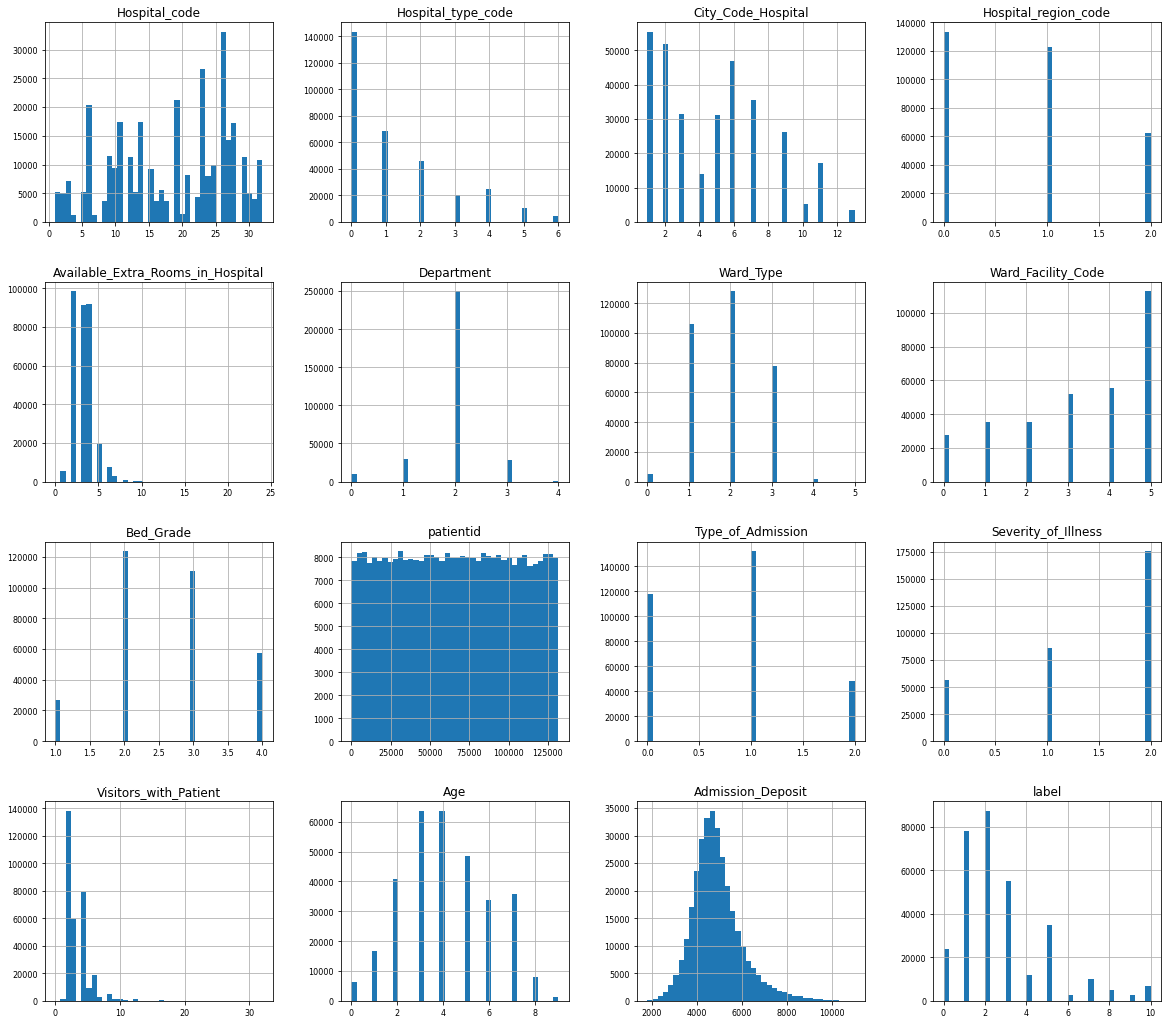

In [38]:
df_train.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

Mapa de calor de la correlación entre características

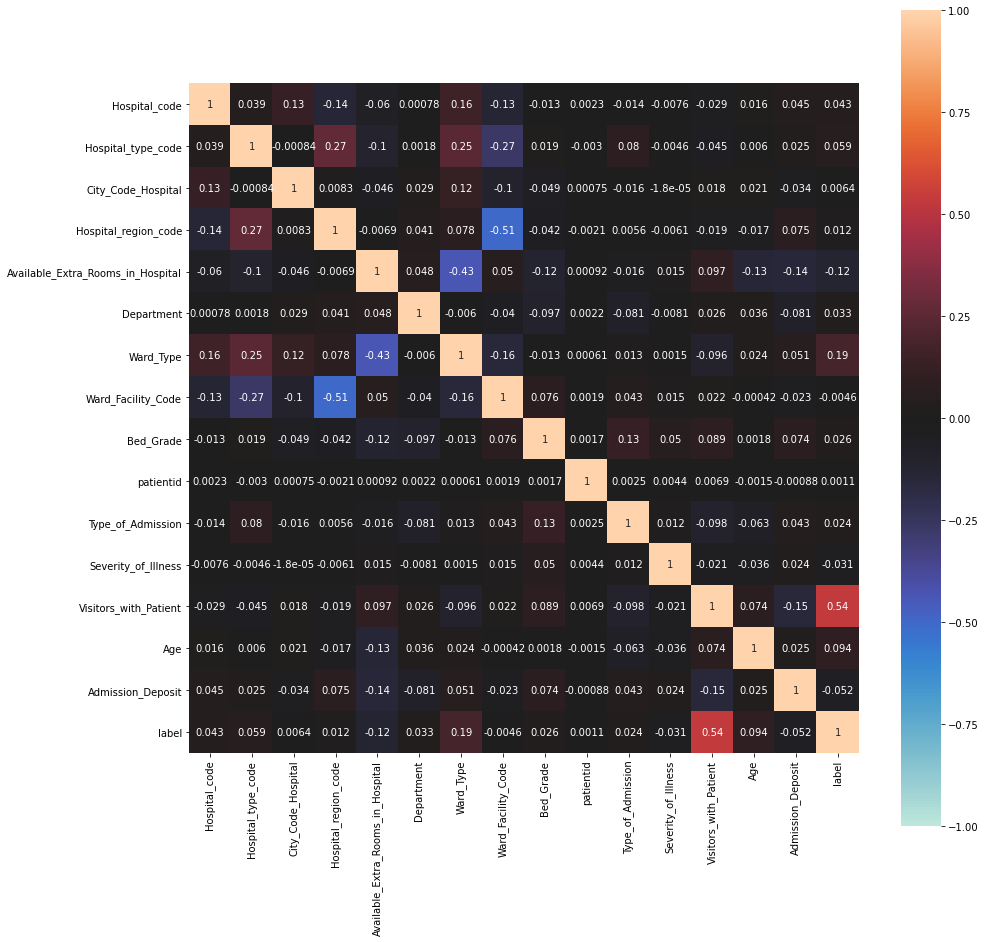

In [39]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_train.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Histograma comparativo de las variables con alta correlacióón y/o de interés

/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


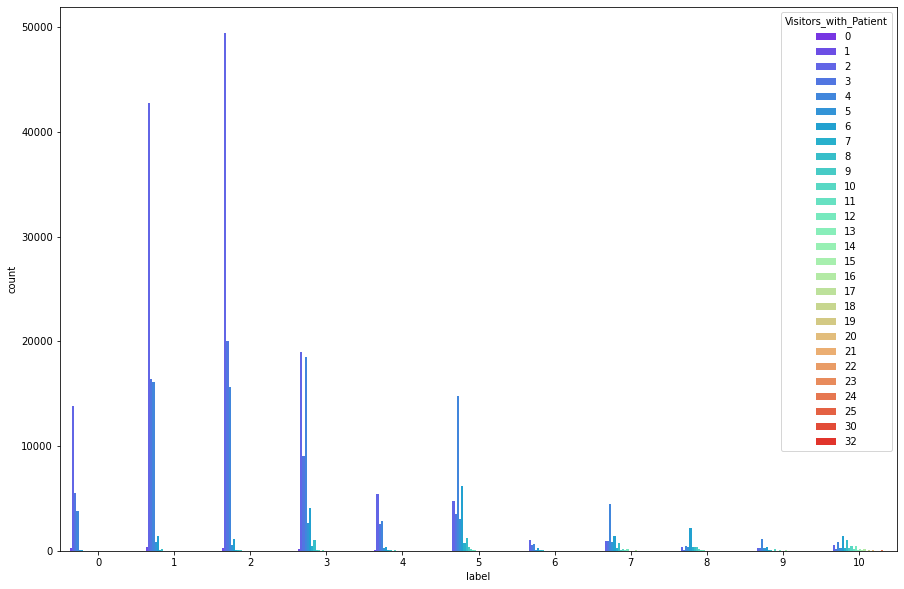

In [40]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['label'],hue=df_train['Visitors_with_Patient'],palette='rainbow', )
plt.show()

/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


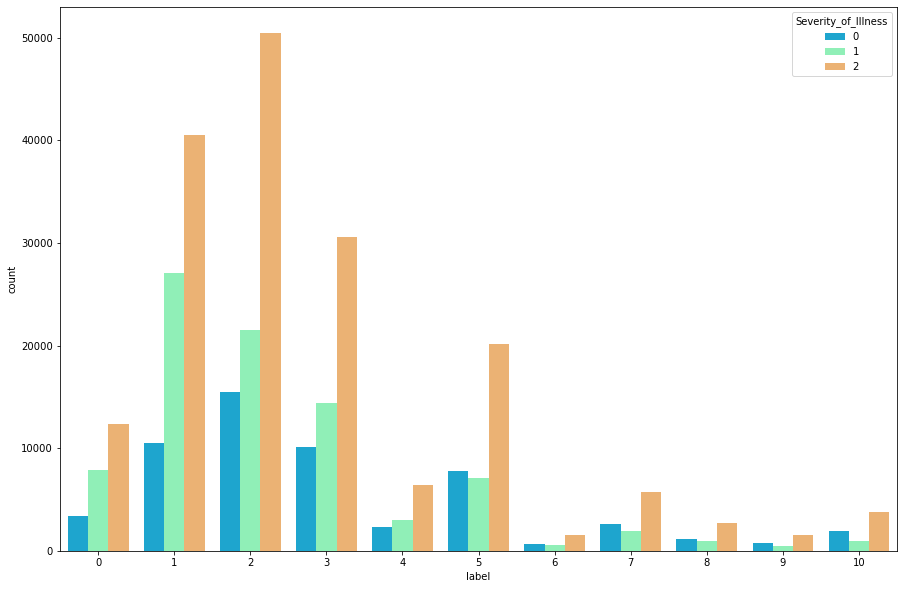

In [41]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['label'],hue=df_train['Severity_of_Illness'],palette='rainbow', )
plt.show()

/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


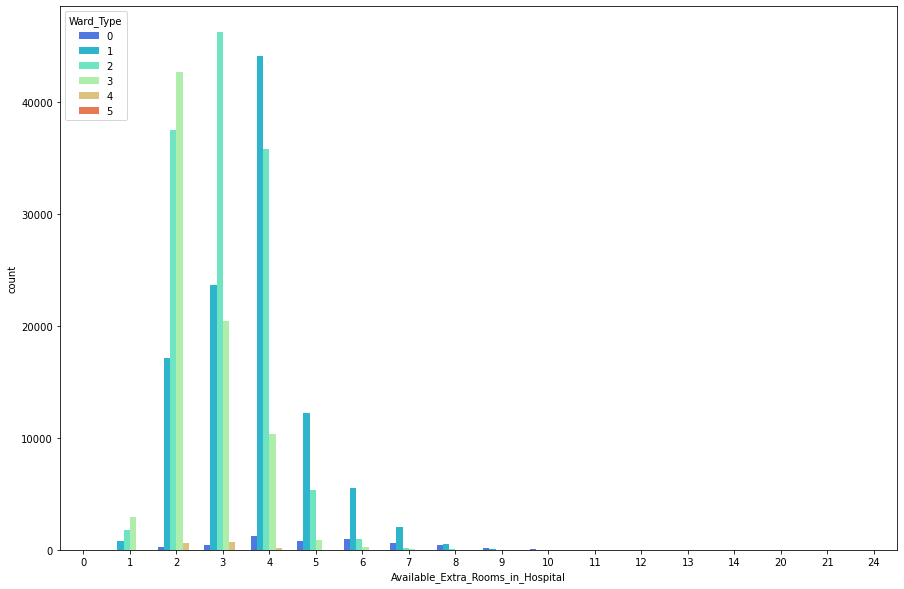

In [42]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Available_Extra_Rooms_in_Hospital'],hue=df_train['Ward_Type'],palette='rainbow', )
plt.show()

/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


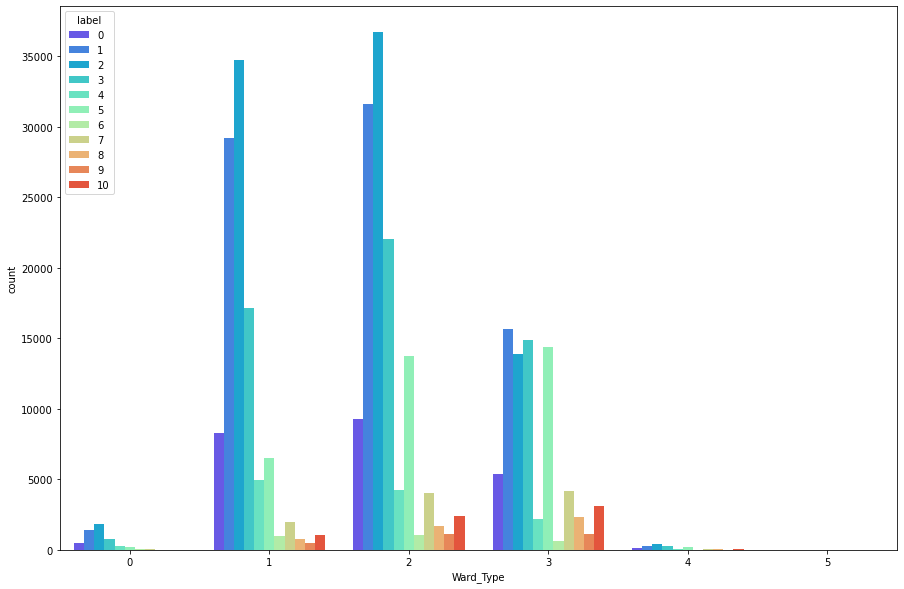

In [43]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Ward_Type'],hue=df_train['label'],palette='rainbow', )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


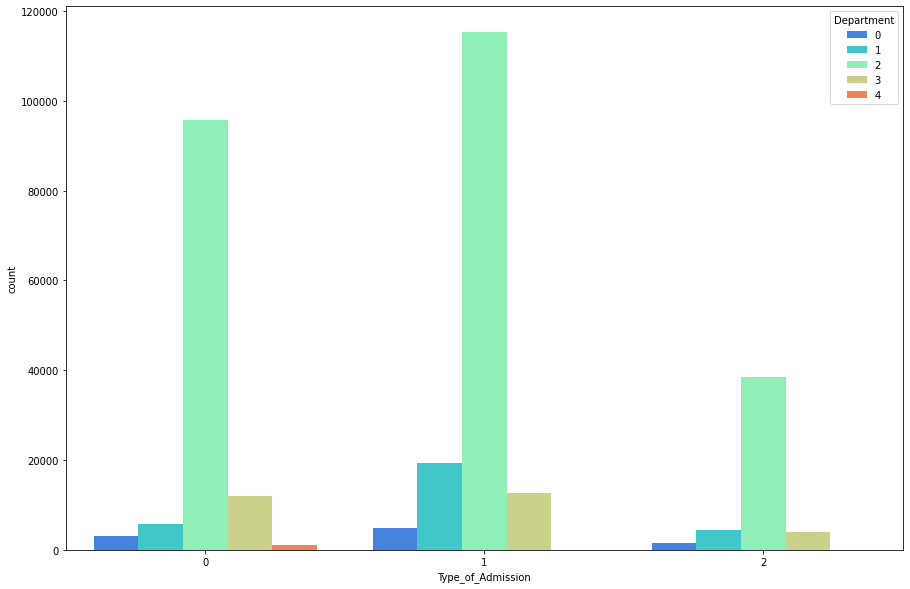

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['Type_of_Admission'],hue=df_train['Department'],palette='rainbow')
plt.show()

Diagramas de cajas

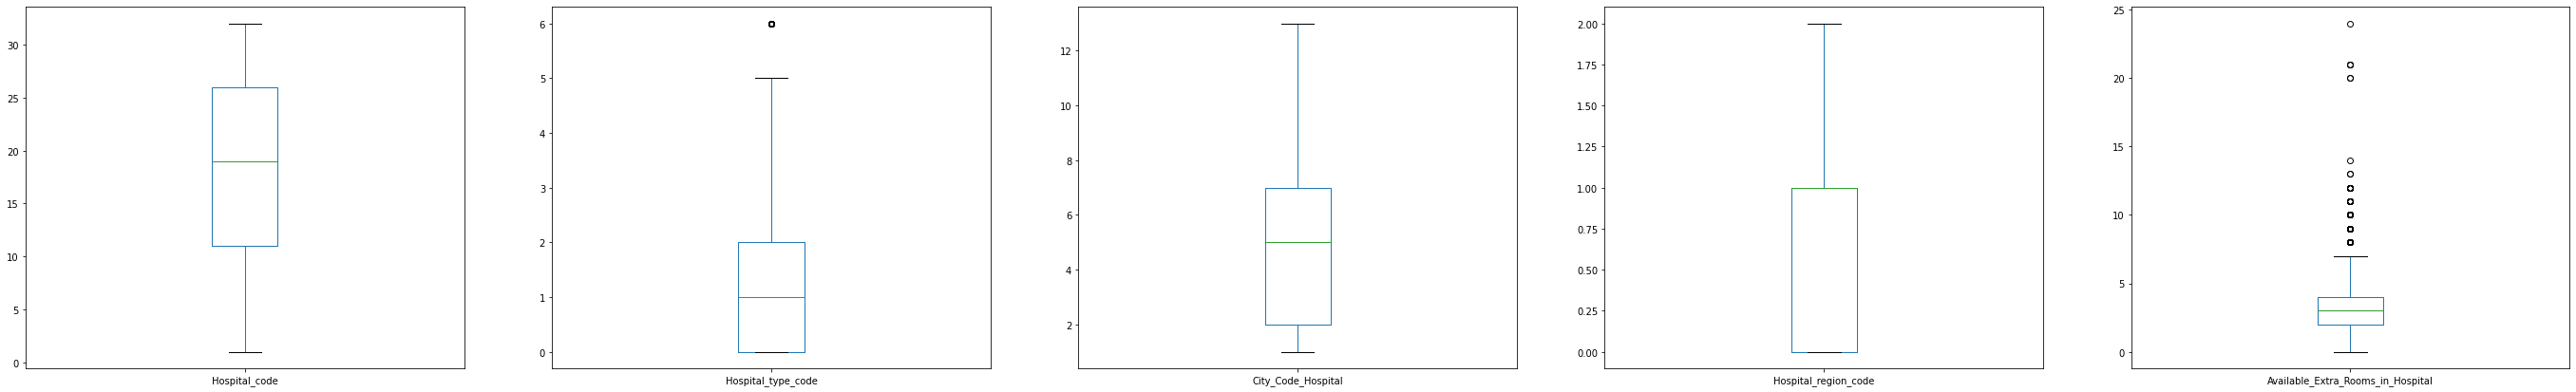

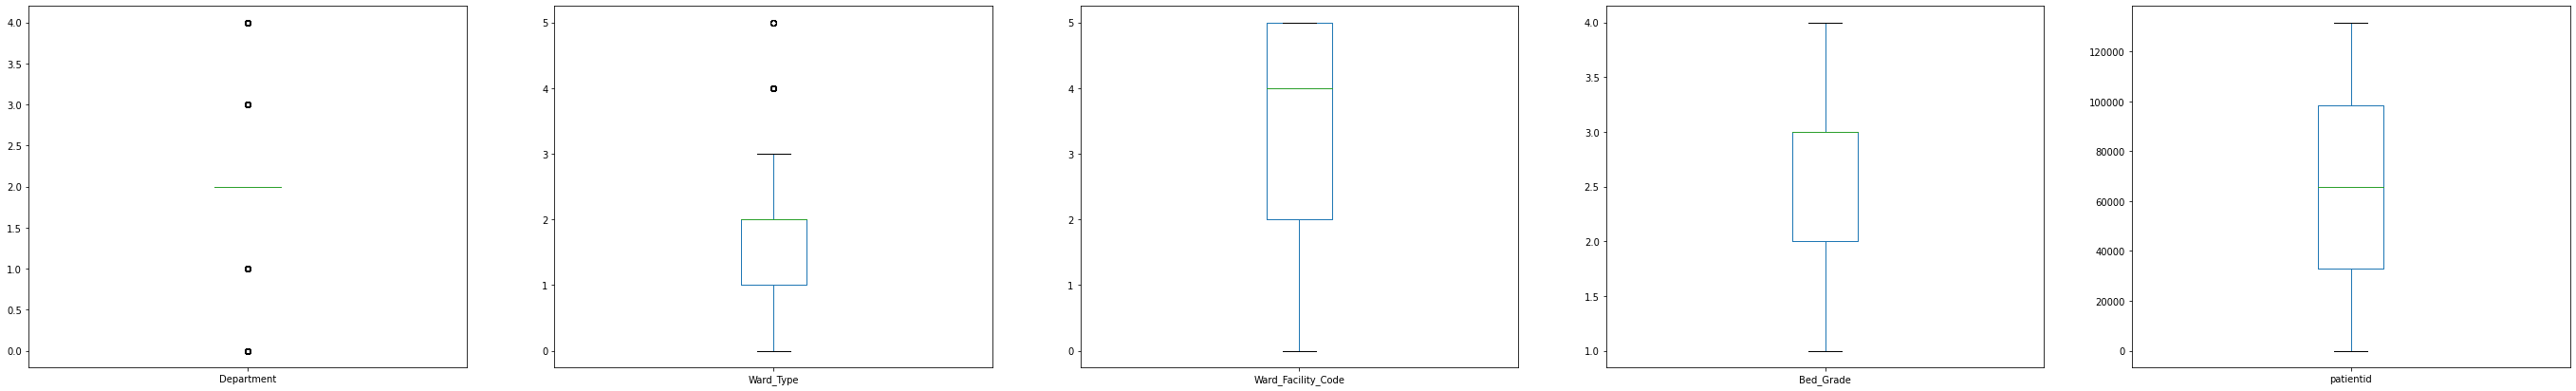

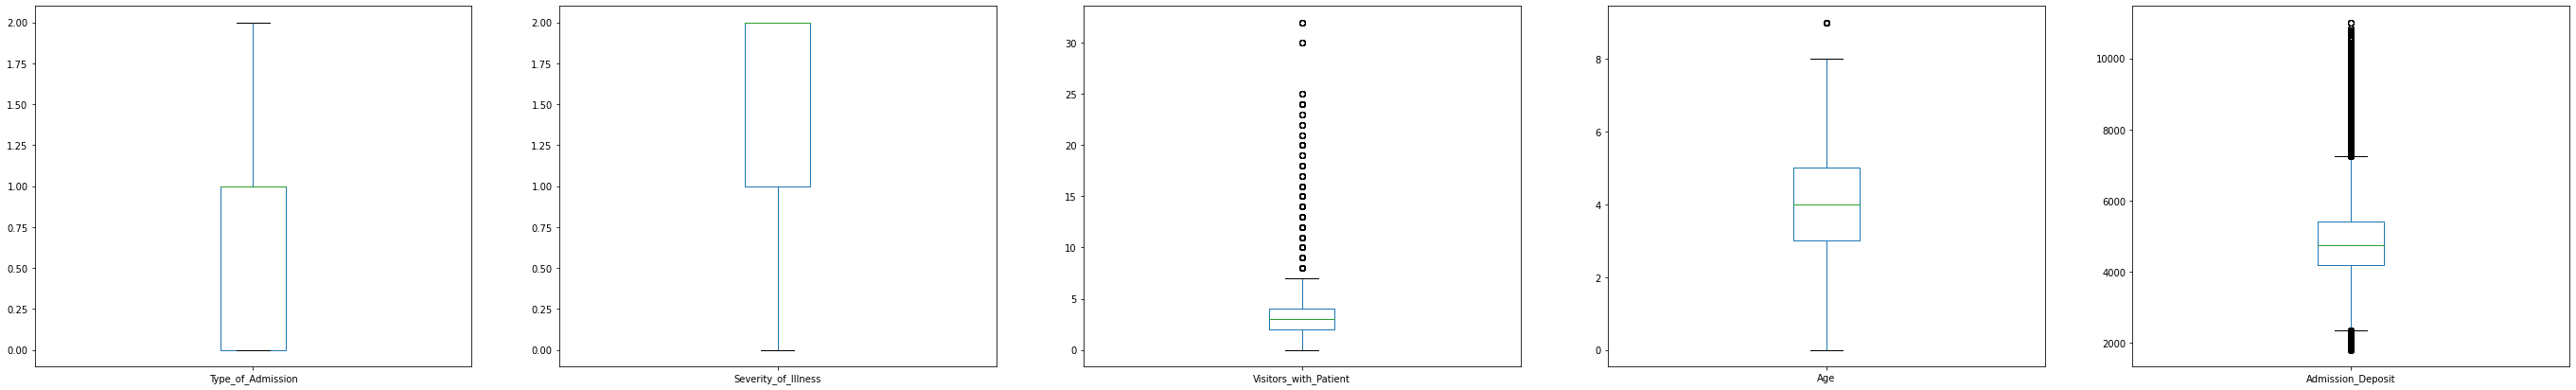

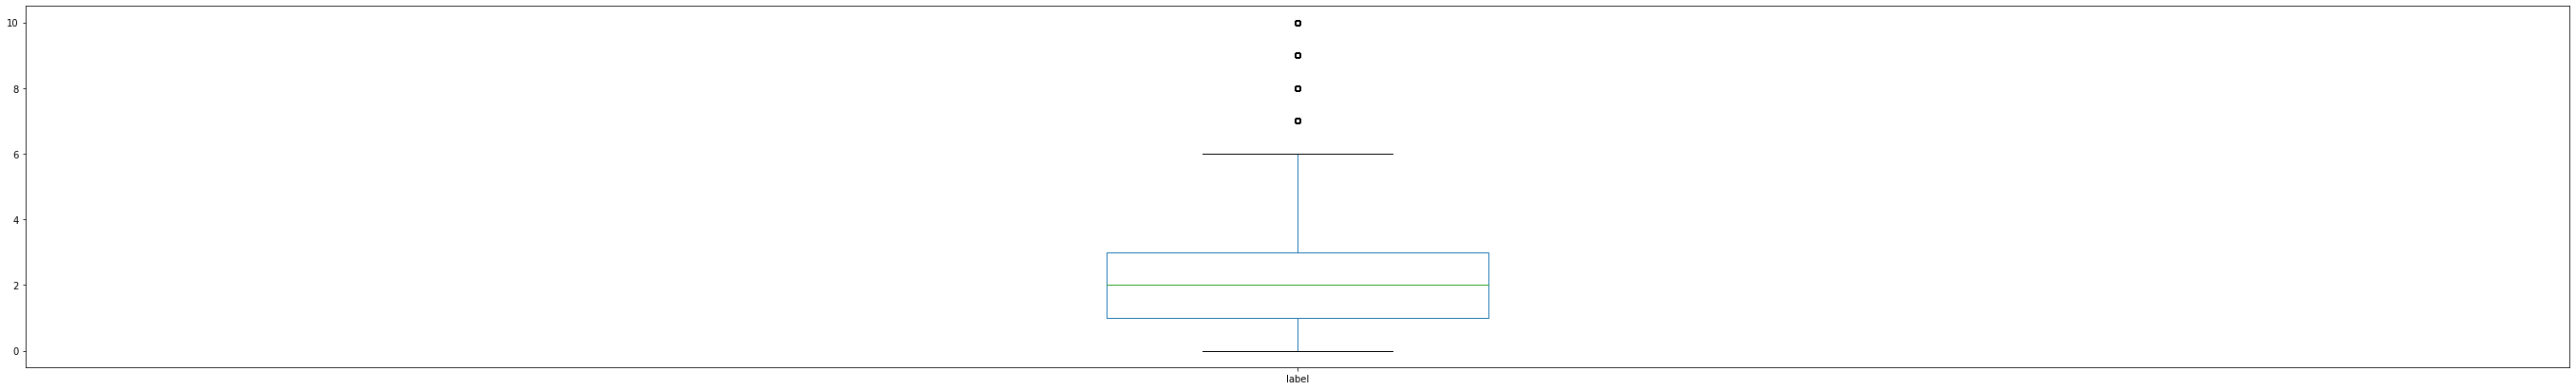

In [ ]:
for x in range(int(df_train.shape[1]/5) + 1):
    df_train.iloc[:,x*5:(x + 1)*5].plot(kind='box',subplots=True, sharex=False, sharey=False, figsize=(48,7))
    plt.show()

Scatter plots

In [ ]:
def pair_plots(variable, data = df_train ):
    for x in range(int(data.shape[0]/5) + 1):
        try:
            sns.pairplot(data=data, x_vars = data.iloc[:,x*5:(x + 1)*5].columns.values.tolist(), y_vars = [variable])
            plt.show()
        except ValueError:
            break

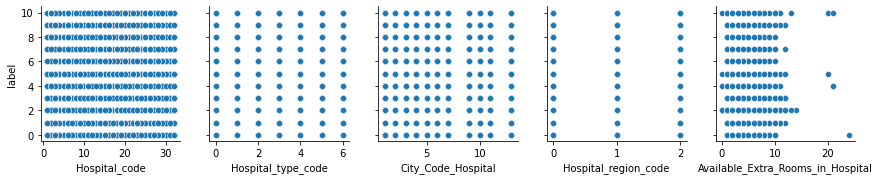

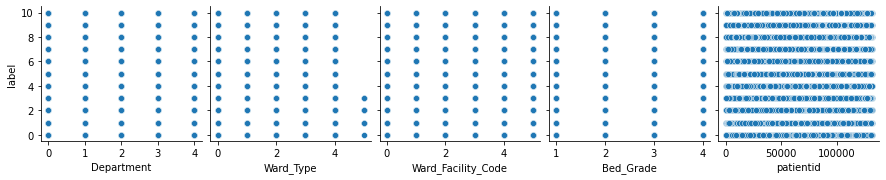

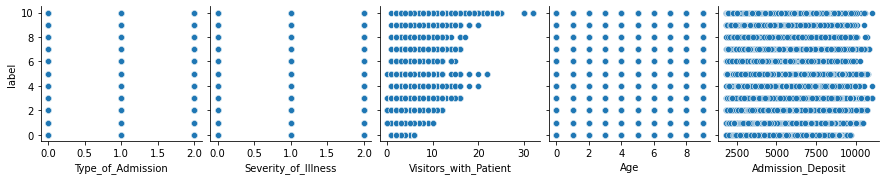

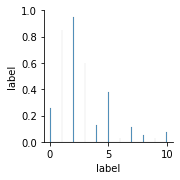

In [ ]:
pair_plots("label")

## SMOTE (oversampling)

In [65]:
import imblearn

In [76]:
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,label
case_id,,,,,,,,,,,,,,,,
1,8,2,3,2,3,3,2,5,2,31397,0,0,2,5,4911,0
2,2,2,5,2,2,3,3,5,2,31397,1,0,2,5,5954,4
3,10,4,1,0,2,1,3,4,2,31397,1,0,2,5,4745,3
4,26,1,2,1,2,3,2,3,2,31397,1,0,2,5,7272,4
5,26,1,2,1,2,3,3,3,2,31397,1,0,2,5,5558,4


Class=0, n=23604 (7.412%)
Class=4, n=11743 (3.688%)
Class=3, n=55159 (17.322%)
Class=1, n=78139 (24.538%)
Class=5, n=35018 (10.997%)
Class=2, n=87491 (27.475%)
Class=7, n=10254 (3.220%)
Class=10, n=6683 (2.099%)
Class=8, n=4838 (1.519%)
Class=6, n=2744 (0.862%)
Class=9, n=2765 (0.868%)


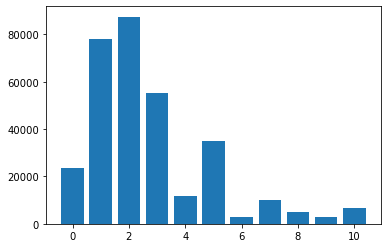

In [77]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
# load the csv file as a data frame
df = df_train.drop(columns=["patientid","Hospital_code", 'Hospital_region_code',"Hospital_type_code", "City_Code_Hospital", "Ward_Facility_Code"])
data_X = df.drop('label',1)
data_Y = df['label']
X = data_X.values
y = data_Y.values

#X, y = data.drop('Stay'), data['Stay']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=87491 (9.091%)
Class=4, n=87491 (9.091%)
Class=3, n=87491 (9.091%)
Class=1, n=87491 (9.091%)
Class=5, n=87491 (9.091%)
Class=2, n=87491 (9.091%)
Class=7, n=87491 (9.091%)
Class=10, n=87491 (9.091%)
Class=8, n=87491 (9.091%)
Class=6, n=87491 (9.091%)
Class=9, n=87491 (9.091%)


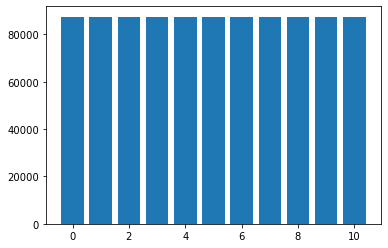

In [78]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
  per = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Entrenamiento con todas las características despues de haber hecho SMOTE

## Decision Tree

In [79]:
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalizamos cada característica
X_norm = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
X_train_norm = scaler.transform(x_train)
X_test_norm = scaler.transform(x_test)

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [81]:
max_depth = np.arange(1,10)
min_samples_leaf = [50,100,200]

param_grid = {'criterion': ['entropy'], 'max_depth': np.arange(3,15),'min_samples_leaf':np.arange(1,40)}

dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model,param_grid, cv=3, verbose=2, n_jobs=-1)

dtree_model=dtree_model.fit(x_train,y_train)
print(dtree_model.best_params_)

Fitting 3 folds for each of 468 candidates, totalling 1404 fits
{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1}


In [82]:

my_model = dtree_model.best_estimator_

my_tree=my_model.fit(x_train,y_train)

y_pred = my_model.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.375798130724591
[[ 8539  2568  1734    79  2388    77  1623   148    50   209    38]
 [ 2935  6138  3707   348  1737   510  1020   440   202   413    73]
 [ 2001  4873  6380   182  1912   248  1211   266   134   351    89]
 [ 1622  2701  3037  1094  1772  2426  1269  1390   950  1060   230]
 [ 3100  1994  2293   137  5320   338  2949   484   242   540   117]
 [  873   811   980   839   670  4563   753  2773  2240  2202   622]
 [ 2065   852  1293    93  2729   422  7439   804   574  1005   299]
 [  763   620   591   417   503  2836   788  4901  1674  3079  1205]
 [  307   185   166   187   212  1271   378   958 10963  1066  1810]
 [  533   362   393   172   426  1679   689  2358  1110  8430  1237]
 [  382   275   229   154   276  1116   396   989  3660  1579  8567]]


[[ 8539  2568  1734    79  2388    77  1623   148    50   209    38]
 [ 2935  6138  3707   348  1737   510  1020   440   202   413    73]
 [ 2001  4873  6380   182  1912   248  1211   266   134   351    89]
 [ 1622  2701  3037  1094  1772  2426  1269  1390   950  1060   230]
 [ 3100  1994  2293   137  5320   338  2949   484   242   540   117]
 [  873   811   980   839   670  4563   753  2773  2240  2202   622]
 [ 2065   852  1293    93  2729   422  7439   804   574  1005   299]
 [  763   620   591   417   503  2836   788  4901  1674  3079  1205]
 [  307   185   166   187   212  1271   378   958 10963  1066  1810]
 [  533   362   393   172   426  1679   689  2358  1110  8430  1237]
 [  382   275   229   154   276  1116   396   989  3660  1579  8567]]


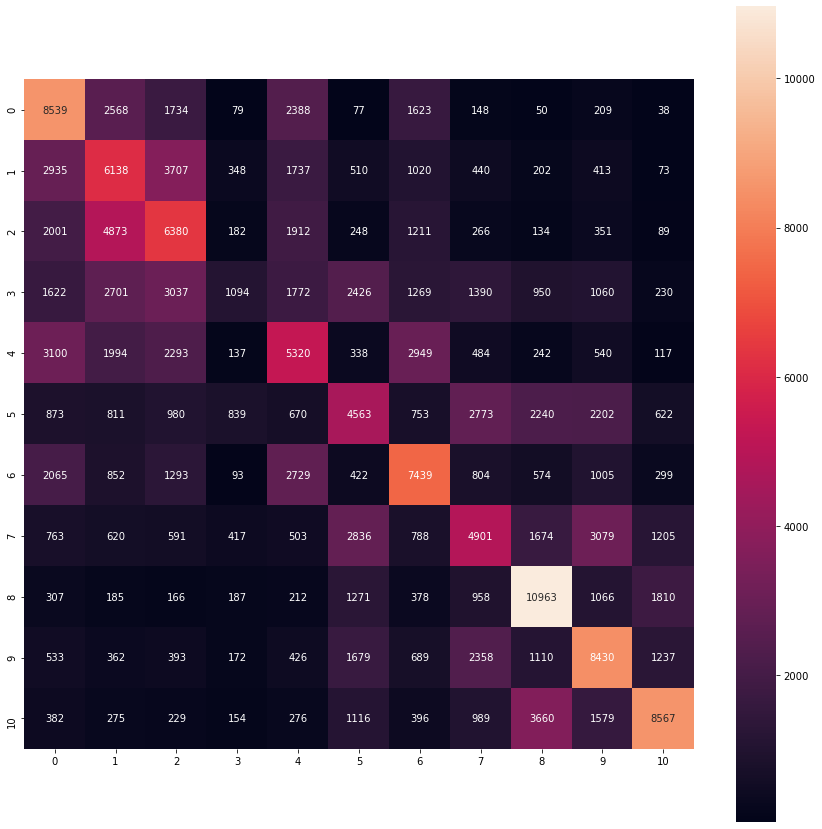

In [83]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
#plt.savefig("/content/healthcare/correlacion_confusion.jpg")
plt.show()